In [ ]:
!pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-6ldh4pxk
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-6ldh4pxk


In [ ]:
#%reset -f
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.models.fcn import fcn_8_vgg

In [ ]:
model = vgg_unet(n_classes= 66)

model.train(
    train_images =  "/content/drive/MyDrive/dataset/training/imagescartella/images/",
    train_annotations = "/content/drive/MyDrive/dataset/training/labelscartella/masks/",
    checkpoints_path = "/tmp/vgg_1" ,
    n_classes = 66,
    epochs=5,
    batch_size = 2,
    verify_dataset = False,
    validate = False,
    val_images =  "/content/drive/MyDrive/dataset/validation/imagescartella/images/",
    val_annotations= "/content/drive/MyDrive/dataset/validation/labelscartella/masks/",
    val_batch_size=2,
    gen_use_multiprocessing=True,
    do_augment = True,
    optimizer_name='adam'
)

In [ ]:
from keras_segmentation.predict import get_colored_segmentation_image
from keras_segmentation.models.fcn import fcn_8_vgg

color_map = np.asarray([
      [165, 42, 42],
      [0, 192, 0],
      [196, 196, 196],
      [190, 153, 153],
      [180, 165, 180],
      [102, 102, 156],
      [102, 102, 156],
      [128, 64, 255],
      [140, 140, 200],
      [170, 170, 170],
      [250, 170, 160],
      [96, 96, 96],
      [230, 150, 140],
      [128, 64, 128],
      [110, 110, 110],
      [244, 35, 232],
      [150, 100, 100],
      [70, 70, 70],
      [150, 120, 90],
      [220, 20, 60],
      [255, 0, 0],
      [255, 0, 0],
      [255, 0, 0],
      [200, 128, 128],
      [255, 255, 255],
      [64, 170, 64],
      [128, 64, 64],
      [70, 130, 180],
      [255, 255, 255],
      [152, 251, 152],
      [107, 142, 35],
      [0, 170, 30],
      [255, 255, 128],
      [250, 0, 30],
      [0, 0, 0],
      [220, 220, 220],
      [170, 170, 170],
      [222, 40, 40],
      [100, 170, 30],
      [40, 40, 40],
      [33, 33, 33],
      [170, 170, 170],
      [0, 0, 142],
      [170, 170, 170],
      [210, 170, 100],
      [153, 153, 153],
      [128, 128, 128],
      [0, 0, 142],
      [250, 170, 30],
      [192, 192, 192],
      [220, 220, 0],
      [180, 165, 180],
      [119, 11, 32],
      [0, 0, 142],
      [0, 60, 100],
      [0, 0, 142],
      [0, 0, 90],
      [0, 0, 230],
      [0, 80, 100],
      [128, 64, 64],
      [0, 0, 110],
      [0, 0, 70],
      [0, 0, 192],
      [32, 32, 32],
      [0, 0, 0],
      [0, 0, 0],
      ])

model = fcn_8_vgg(n_classes= 66)

predict_multiple(model=model, inps=None, inp_dir='/media', out_dir='/home',
                     checkpoints_path=None, overlay_img=False,
                     class_names=None, show_legends=False, colors=color_map,
                     prediction_width=None, prediction_height=None, read_image_type=1)


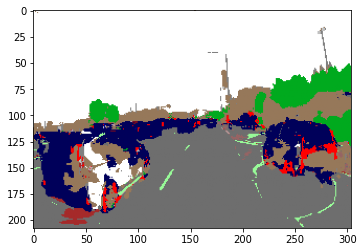

In [ ]:
out = model.predict_segmentation(
  checkpoints_path="/tmp/vgg_1",
  inp="/WEiJ6ccLz4OsXfWhKAIboQ.jpg",
  out_fname="/output.png"
)

output = get_colored_segmentation_image(out,66,color_map)/255

plt.figure(1)
plt.imshow(output)


In [ ]:
from keras_segmentation.predict import overlay_seg_image
x = io.imread('/WEiJ6ccLz4OsXfWhKAIboQ.jpg')
fusa = overlay_seg_image(x,output)


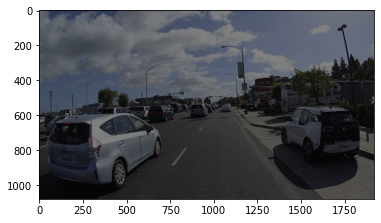

In [ ]:
plt.figure(1)
plt.imshow(fusa)

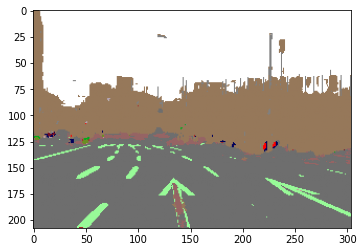

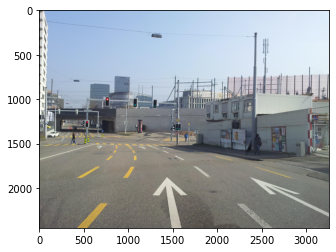

In [ ]:
out = model.predict_segmentation(
  checkpoints_path="/tmp/vgg_1",
  inp="/jqh8xIPwEZiRmWEwY9ZVaA.jpg",
  out_fname="/output.png"
)

output = get_colored_segmentation_image(out,66,color_map)/255

plt.figure(1)
plt.imshow(output)
plt.figure(2)
plt.imshow(io.imread("/jqh8xIPwEZiRmWEwY9ZVaA.jpg"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


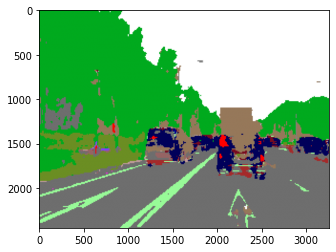

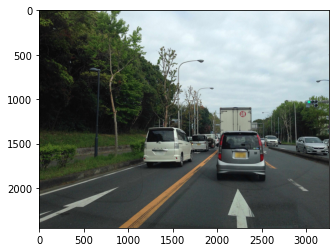

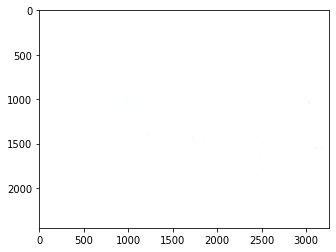

In [ ]:
import cv2
out = model.predict_segmentation(
  checkpoints_path="/tmp/vgg_1",
  inp="/zZjYKIN7hLJ9uTMsVpClNw.jpg",
  out_fname="/output.png"
)
x = io.imread("/zZjYKIN7hLJ9uTMsVpClNw.jpg")/255
output = get_colored_segmentation_image(out,66,color_map)/255
output = cv2.resize(output, (x.shape[1], x.shape[0]), interpolation=cv2.INTER_NEAREST)
plt.figure(1)
plt.imshow(output)
plt.figure(2)
plt.imshow(x)
y =  (x + output)
y_n = 1/(np.max(y)-np.min(y))*(y-np.min(y))
plt.figure(3)
plt.imshow(y_n)

In [ ]:
out = model.predict_segmentation(
  checkpoints_path="/tmp/vgg_1",
  inp="/WEiJ6ccLz4OsXfWhKAIboQ.jpg",
  out_fname="/output.png"
)

output = get_colored_segmentation_image(out,66,color_map)/255

plt.figure(1)
plt.imshow(output)